## **Chapter 3: LINEAR REGRESSION**
Code Sources:
* [GITHUB - junyanyao](https://github.com/junyanyao/ISLR_Python/blob/master/Ch3%20Linear%20Regression.ipynb) : Contour Figure
* [GITHUB - qx0731](https://github.com/qx0731/Sharing_ISL_python/blob/master/Chapter_3_sec_6.1_6.7.ipynb) : Section 3.6.1
* [GITHUB - DTRuiz](https://github.com/DTRuiz/ISLpy/blob/master/Chapter3_exercises.ipynb) : Exercise
* [GITHUB - pedvide](https://github.com/pedvide/ISLR_Python/blob/master/Chapter3_Linear_regression.ipynb) : Credit & Auto Dataset Exploration
* [GITHUB - JWarmenhoven](https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%203.ipynb) : Plane Plot
* [GITHUB - qchenevier](https://github.com/qchenevier/ISLR-python/blob/master/Notebooks/Chapter%203.ipynb) : All Figures and Tables
* [GITHUB - collinprather](https://github.com/collinprather/ISLR-Python/blob/master/Chapter%203%20Linear%20Regression.ipynb) : Dealing with Qualitative or Categorical Data

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
import sklearn.linear_model as skl_lm
from mpl_toolkits.mplot3d import axes3d
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **3.1 Simple Linear Regression**

$$Y ≈ β_0 + β_1 X$$

$$_ Y is approximately modeled as beta zero plus beta one times X _$$

#### ***Exploring the Data***

In [2]:
url="https://raw.githubusercontent.com/junyanyao/ISLR_Python/master/Dataset/Advertising.csv"
ad=pd.read_csv(url)
ad.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#Removing the 'Unnamed: 0' column
ad=ad.drop('Unnamed: 0',axis=1) #Axis=1 means we remove the entire column
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0, 0.5, 'Sales')

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


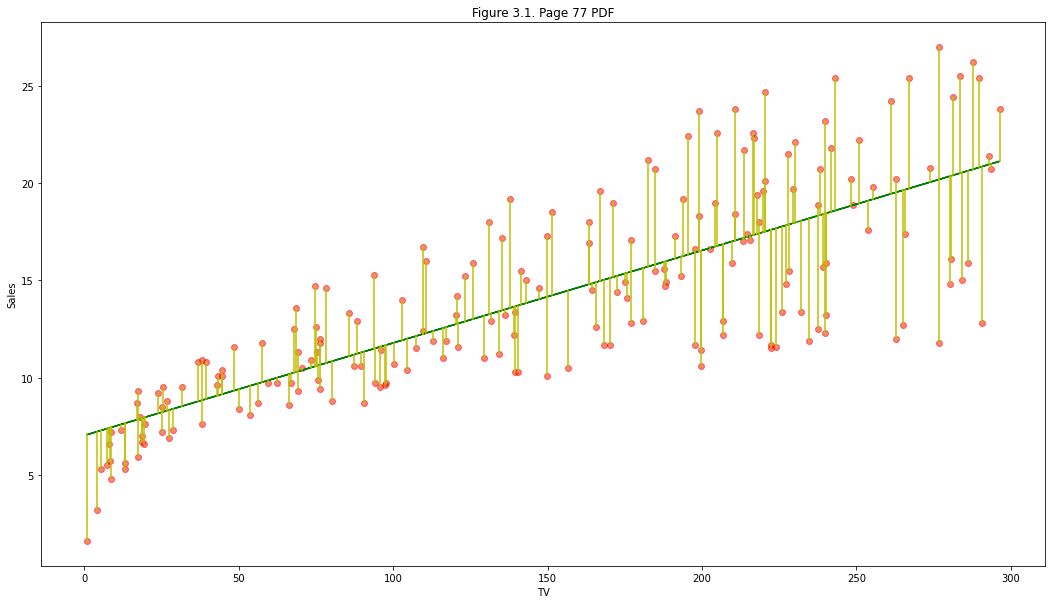

In [4]:
fig,ax=plt.subplots(figsize=(18,10),facecolor='white')
ax.scatter('TV','Sales',data=ad,color='red',alpha=0.5)
x=ad.TV
m,b=np.polyfit(ad.TV,ad.Sales,1)
y=m*x+b
ax.plot(x,y,color='green')
for i in range(len(x)):
  ax.plot([ad.TV[i],x[i]],[y[i],ad.Sales[i]],'-',color='Y')
ax.set_title('Figure 3.1. Page 77 PDF')
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

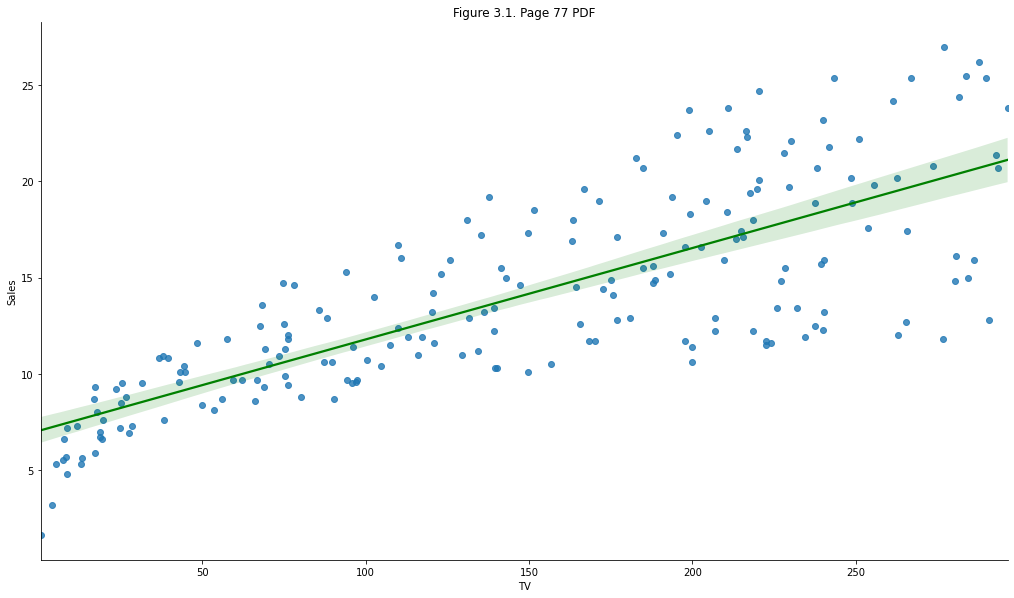

In [5]:
#Another way to plot the data using Seaborn
plt.rcParams['figure.facecolor']='white'
sns.lmplot(x='TV',y='Sales',data=ad,height=8,aspect=1.75,line_kws={'color':'green'})
#ax=plt.gca()
#ax.set_title("Figure 3.1. Page 77 PDF")
plt.title("Figure 3.1. Page 77 PDF")
plt.show()

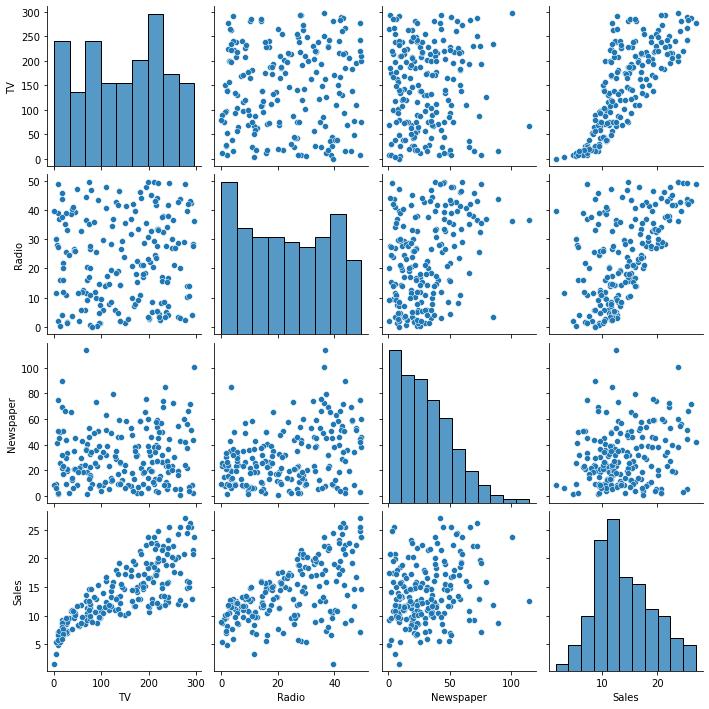

In [6]:
#Let's check the pairplot
plt.rcParams['figure.facecolor']='white'
sns.pairplot(data=ad)
plt.show()

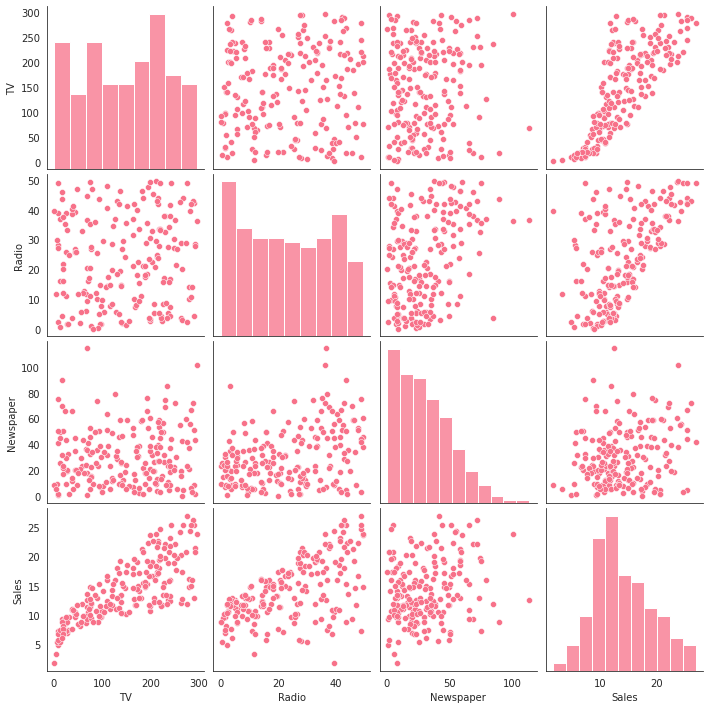

In [7]:
#Another way to plot the pairplot
sns.set_style("white")
sns.set_palette("husl") 
sns.pairplot(data=ad)
plt.show()

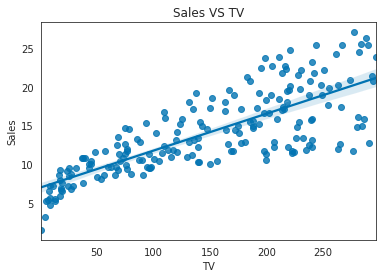

In [8]:
#Plotting data in linear regression model fit in Seaborn
sns.set_style("white")
sns.set_palette("colorblind") 
sns.regplot(x='TV',y='Sales',data=ad)
plt.title("Sales VS TV")
plt.show()

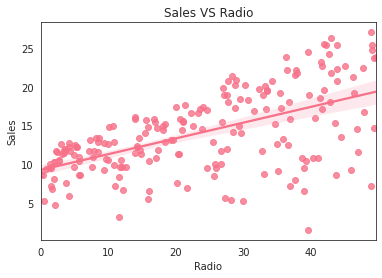

In [9]:
#Plotting data in linear regression model fit in Seaborn
sns.set_style("white")
sns.set_palette("husl") 
sns.regplot(x='Radio',y='Sales',data=ad)
plt.title("Sales VS Radio")
plt.show()

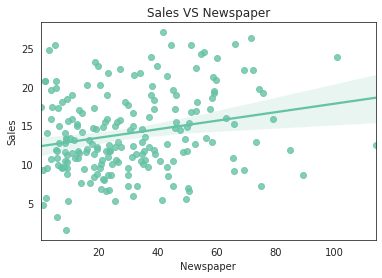

In [10]:
#Plotting data in linear regression model fit in Seaborn
sns.set_style("white")
sns.set_palette("Set2") 
sns.regplot(x='Newspaper',y='Sales',data=ad)
plt.title("Sales VS Newspaper")
plt.show()

#### ***The Linear Regression***

In [11]:
#Model the Linear Regression with SKLEARN
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)

Recalling the mathematical model of Linear Regression shown below, 
$$Y ≈ β_0 + β_1 X$$

$Y$ represents the quantitative response given the basis predictor variable
$X$
So, in other words, this formula is trying to regress Y on X.

The betas are:
* $β_0$ that represents the *intercept*, the expected value of $Y$ when $X=0$
* $β_1$ that represents the *slope*, the average increase in $Y$ associated with one unit increase in $X$

##### **SALES VS TV**

In [12]:
#Sales X TV without scaling
x=ad['TV']
y=ad['Sales']

reg=model.fit(x[:,np.newaxis],y)
print("Regression Coefficient = ",reg.coef_)
print("Regression Intercept = ",reg.intercept_)

Regression Coefficient =  [0.04753664]
Regression Intercept =  7.032593549127695


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


In [13]:
#Sales X TV with scaling
model=skl_lm.LinearRegression()

x=scale(ad['TV'],with_mean=True,with_std=False).reshape(-1,1)
y=ad['Sales']

reg=model.fit(x,y)
print("Regression Coefficient = ",reg.coef_)
print("Regression Intercept = ",reg.intercept_)

Regression Coefficient =  [0.04753664]
Regression Intercept =  14.0225


In [14]:
#Statistical model of the data (From Table 3.1 Page 83)
#Using statsmodels.formula.api
est=smf.ols('Sales~TV',ad).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053


##### **SALES VS RADIO**

In [15]:
#Sales X TV without scaling
x=ad['Radio']
y=ad['Sales']

reg=model.fit(x[:,np.newaxis],y)
print("Regression Coefficient = ",reg.coef_)
print("Regression Intercept = ",reg.intercept_)

Regression Coefficient =  [0.20249578]
Regression Intercept =  9.311638095158283


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


In [16]:
#Sales X TV with scaling
model=skl_lm.LinearRegression()

x=scale(ad['Radio'],with_mean=True,with_std=False).reshape(-1,1)
y=ad['Sales']

reg=model.fit(x,y)
print("Regression Coefficient = ",reg.coef_)
print("Regression Intercept = ",reg.intercept_)

Regression Coefficient =  [0.20249578]
Regression Intercept =  14.022500000000003


In [17]:
#Statistical model of the data (From Table 3.1 Page 83)
#Using statsmodels.formula.api
est=smf.ols('Sales~Radio',ad).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


##### **SALES VS NEWSPAPER**

In [18]:
#Sales X TV without scaling
x=ad['Newspaper']
y=ad['Sales']

reg=model.fit(x[:,np.newaxis],y)
print("Regression Coefficient = ",reg.coef_)
print("Regression Intercept = ",reg.intercept_)

Regression Coefficient =  [0.0546931]
Regression Intercept =  12.35140706927816


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


In [19]:
#Sales X TV with scaling
model=skl_lm.LinearRegression()

x=scale(ad['Newspaper'],with_mean=True,with_std=False).reshape(-1,1)
y=ad['Sales']

reg=model.fit(x,y)
print("Regression Coefficient = ",reg.coef_)
print("Regression Intercept = ",reg.intercept_)

Regression Coefficient =  [0.0546931]
Regression Intercept =  14.0225


In [20]:
#Statistical model of the data (From Table 3.1 Page 83)
#Using statsmodels.formula.api
est=smf.ols('Sales~Newspaper',ad).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


From the summary statistics above, we can see that the Coefficient of Newspaper is 0.0547 which means 

### **3.2 Multiple Linear Regression**
$$ Sales = β_0 + β_1 × TV + β_2 × Radio + β_3 × Newspaper + ε $$

$$ \hat{y} = \hat{β_0} + \hat{β_1} × x_1 + \hat{β_2} × x_2 + ... + \hat{β_p} × x_p $$

##### **SALES VS ALL PREDICTORS**

In [21]:
#Summary statistics Sales VS All Predictors
lm=smf.ols('Sales~TV+Radio+Newspaper',data=ad).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           1.58e-96
Time:                        07:54:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [22]:
print(np.sqrt(lm.scale))

1.6855103734147439


In [23]:
#Correlation Matrix
ad.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


#####**Important Notes**
1. **Is There a Relationship Between the Response and Predictors?**

$$H_0 : β_1 = β_2 = ... = β_p = 0$$
versus the alternative
$$H_a : at~least~one~β_j~is~non-zero$$
F-Statistic:
$$F=\frac{(TSS-RSS)/p}{RSS/(n-p-1)}$$

2. **Deciding on Important Variables**
  * Forward Selection
  * Backward Selection
  * Mixed Selection
3. **Model Fit**
4. Prediction

##### **Regression Plane of TV-Radio VS Sales**

In [24]:
regr=skl_lm.LinearRegression()

x=ad[['Radio','TV']]
y=ad.Sales
regr.fit(x,y)

print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.9210999124051398


In [25]:
#Creating the Coordinate Grid
Radio=np.arange(0,50)
TV=np.arange(0,300)

B1,B2=np.meshgrid(Radio,TV,indexing='xy')
Z=np.zeros((TV.size,Radio.size))

for (i,j),v in np.ndenumerate(Z):
  Z[i,j]=(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  del sys.path[0]


Text(0.5, 0, 'Sales')

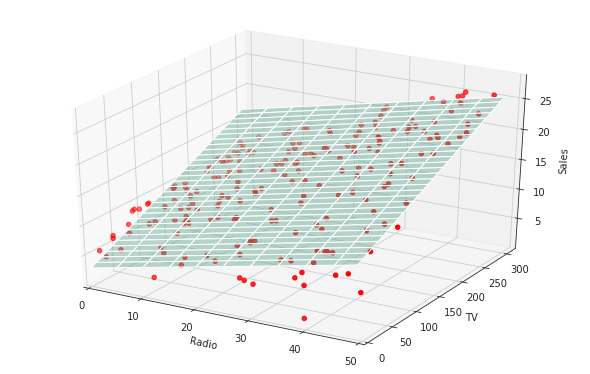

In [26]:
#Plotting Figure 3.4 Page 88 PDF
fig=plt.figure(figsize=(8,5),facecolor='white')
plt.title("X")

ax=axes3d.Axes3D(fig)

ax.plot_surface(B1,B2,Z,rstride=10,cstride=5,alpha=0.4)
ax.scatter3D(ad.Radio,ad.TV,ad.Sales,c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales')

#####**Qualitative Prediction in Multiple Linear Regression**

In [27]:
url="https://raw.githubusercontent.com/junyanyao/ISLR_Python/master/Dataset/Credit.csv"
credit=pd.read_csv(url)
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [28]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [29]:
credit.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [30]:
credit.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

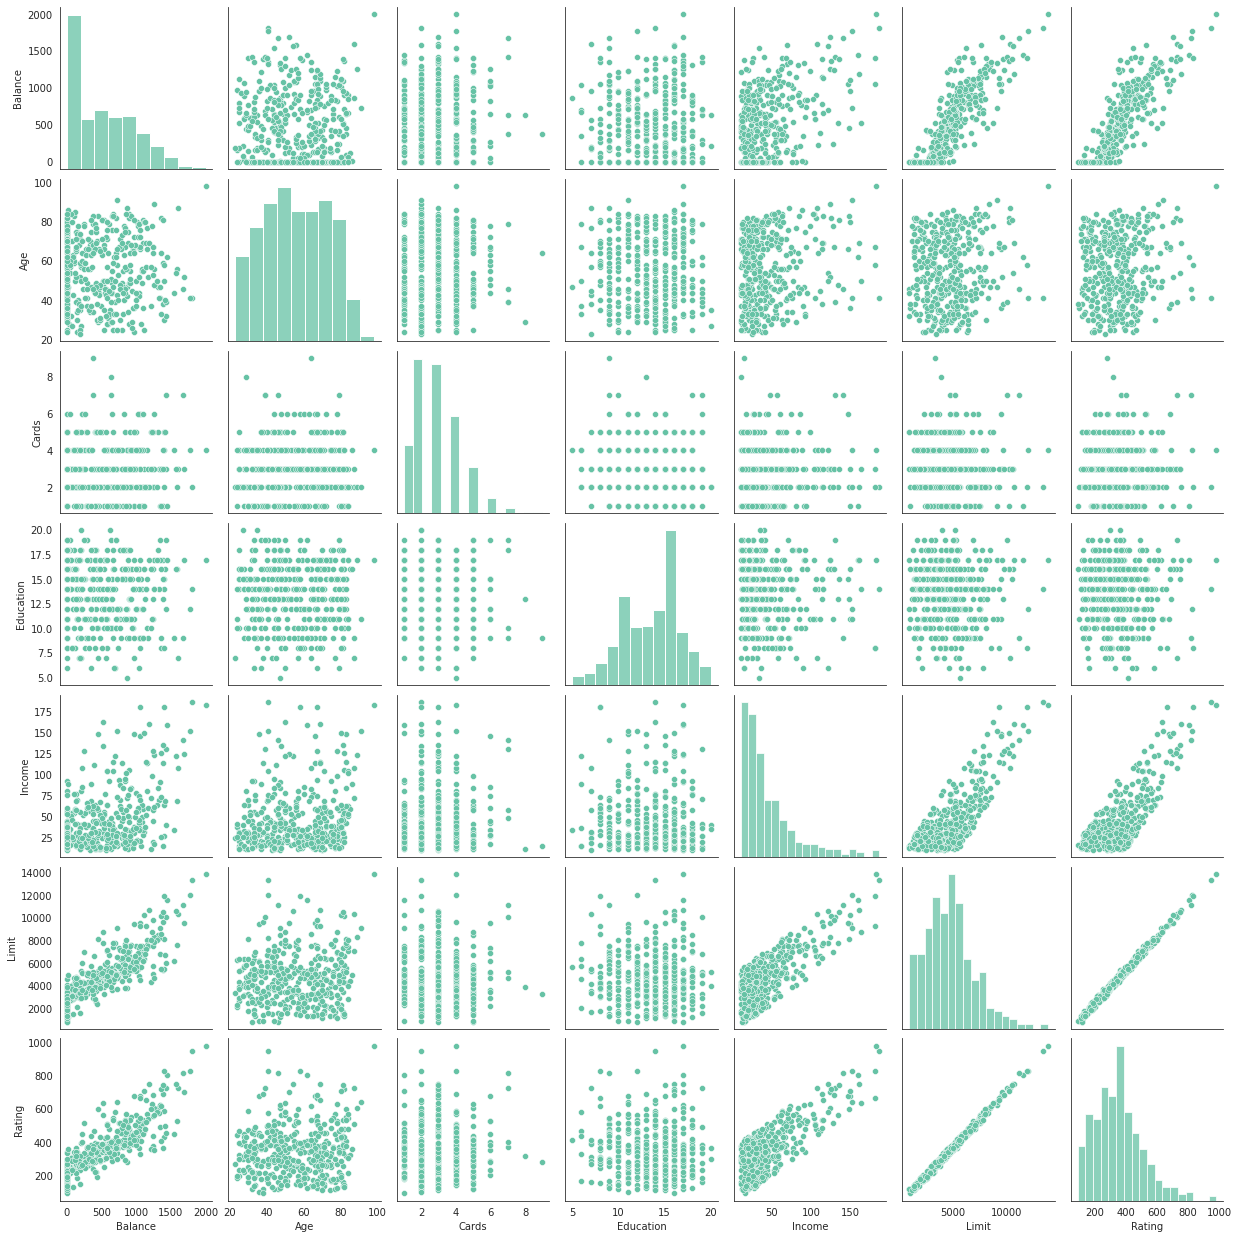

In [31]:
#Plotting the Pairplot
plt.rcParams['figure.facecolor']='white'
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])

In [32]:
est=smf.ols('Balance~Gender',credit).fit()
print(est.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        529.5362     31.988     16.554      0.000     466.649     592.423
Gender[T.Male]   -19.7331     46.051     -0.429      0.669    -110.267      70.801


The table above

In [33]:
est=smf.ols('Balance~Ethnicity',credit).fit()
print(est.summary().tables[1])

                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930


In [34]:
est=smf.ols('Balance~Education',credit).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    535.9662    101.814      5.264      0.000     335.805     736.127
Education     -1.1860      7.374     -0.161      0.872     -15.683      13.311
